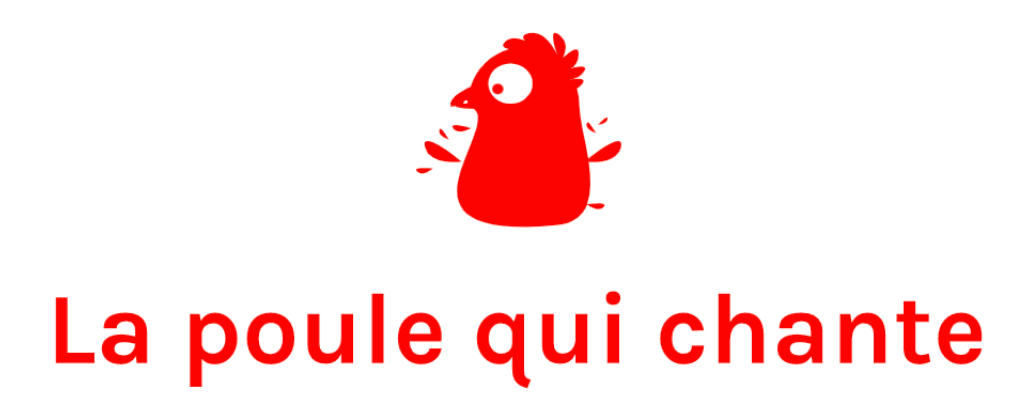

# Etude de marché

### Table des matières :

* [1 - Libriairies et modules](#chap1)
* [2 - Importation des données](#chap2)
    * [2.1 - Les données OpenClassrooms](#chap2.1)
    * [2.2 - Importation de données complémentaires](#chap2.2)
* [3 - Nettoyage des datasets](#chap3)
    * [3.1 - "countries"](#chap3.1)
    * [3.2 - "Population"](#chap3.2)
    * [3.3 - "PIB-GPD"](#chap3.3)
    * [3.4 - "Marché de la volaille"](#chap3.4)
    * [3.5 - "Stabilité"](#chap3.5)
    * [3.6 - "Disponibilités des protéines de volailles](#chap3.6)
    * [3.7 - "Disponibilité totale en protéine (animale et végétale)"](#chap3.7)
    * [3.8 - "Consommation de protéines animales"](#chap3.8)
    * [3.9 - "Morts liées à l'obésité"](#chap3.9)
    * [3.10 - "Somme import et export, divisé par PIB en %"](#chap3.10)
* [4 - Jointure](#chap4)
    * [4.1 - Data final](#chap4.1)
* [5 - Création du fichier CSV](#chap5)
* [6 - Premières constatations](#chap6)
    * [6.1 - Comparaison des indicateurs retenus](#chap6.1)
    * [6.2 - Heatmap des corrélations](#chap6.2)

# 1 - Librairies et modules : <a class="anchor" id="chap1"></a>

In [1]:
#Librairies et modules :
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Pour faciliter la lecture :
pd.set_option('display.max_colwidth', None)

# 2 - Importations des données : <a class="anchor" id="chap2"></a>

### 2.1 - Les données OpenClassrooms : <a class="anchor" id="chap2.1"></a>

In [2]:
# importation des données fournies par OpenClassrooms :
dispo_alim = pd.read_csv('Disponibilite Alimentaire 2017 P9.csv')
pop = pd.read_csv('Population_2000_2018.csv')

In [3]:
dispo_alim.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [4]:
pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


Les données sont trop anciennes pour une bonne étude de marché, on télécharge des données plus récentes, ainsi que des informations complémentaires sur le site de la FAO et de Our World in Data (OWID). Le jeu de donnée complet le plus récent est de 2020, exception faite des données sur l'obésité qui sont de 2019.

### 2.2 - Importation de données complémentaires : <a class="anchor" id="chap2.2"></a>

In [5]:
# Les pays avec groupement :
countries = pd.read_csv('Country groups FAO.csv')

# Population :
pop = pd.read_csv('Population 2020 FAO.csv')

# PIB - GPD : 
gdp = pd.read_csv('GDP FAO.csv')

# Marché de la volaille :
trade = pd.read_csv('Poultry Trade.csv')

# Indicateurs de stabilité politique, alimentaire et macro-economique :
stability = pd.read_csv('Stability FAO.csv')

# Source et utilisation de la production de volaille : 
dispo = pd.read_csv('Poultry Utilisation FAO.csv')

# Total protéines disponibles :
protein = pd.read_csv('Protein Total FAO.csv')

# Consommation de protéines animales pour le PIB: 
protein_anim = pd.read_csv('Animal Protein VS GDP OWID.csv')

# Morts liés à l'obésité : 
obesity = pd.read_csv('Share of Deaths Obesity OWID.csv')

# Marché en pourcentage du PIB
open_economy = pd.read_csv('Trade as Share of GDP OWID.csv')

# 3 - Nettoyage des Datasets : <a class="anchor" id="chap3"></a>

## 3.1 - Countries : <a class="anchor" id="chap3.1"></a>

In [6]:
countries.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,233,Burkina Faso,854.0,BF,BFA


In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Group Code  1964 non-null   int64  
 1   Country Group       1964 non-null   object 
 2   Country Code        1964 non-null   int64  
 3   Country             1964 non-null   object 
 4   M49 Code            1964 non-null   float64
 5   ISO2 Code           1956 non-null   object 
 6   ISO3 Code           1964 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 107.5+ KB


In [8]:
# Vérification de tous les 'Country Group' présents dans le dataset :
countries['Country Group'].unique()

array(['Africa', 'Americas', 'Annex I countries', 'Antarctic Region',
       'Asia', 'Australia and New Zealand', 'Caribbean',
       'Caucasus and Central Asia', 'Central America', 'Central Asia',
       'Central Asia and Southern Asia', 'Eastern Africa', 'Eastern Asia',
       'Eastern Asia (excluding Japan and China)',
       'Eastern Asia (excluding Japan)',
       'Eastern Asia and South-eastern Asia', 'Eastern Europe', 'Europe',
       'European Union (27)', 'High-income economies',
       'Land Locked Developing Countries',
       'Latin America and the Caribbean', 'Least Developed Countries',
       'Low income economies', 'Low Income Food Deficit Countries',
       'Lower-middle-income economies', 'Melanesia', 'Micronesia',
       'Middle Africa', 'Net Food Importing Developing Countries',
       'Non-Annex I countries', 'North and Central America',
       'Northern Africa', 'Northern Africa (excluding Sudan)',
       'Northern America', 'Northern America and Europe',
       '

Seul le groupe 'World' nous intéresse pour conserver tous les pays, sans doublons.

In [9]:
# Selection de ISO3 pour la nomenclature des pays et sélection des pays dans la catégories 'World'
countries_list = countries.loc[countries['Country Group'] == 'World'][['Country','ISO3 Code', 'Country Group']]
#Vérification des duplicatas :
countries_dup = countries_list[countries_list['Country'].duplicated() == True]
countries_dup

,Country,ISO3 Code,Country Group
1733,China,F351,World
1737,"China, mainland",F41,World


In [10]:
# identification des duplicatas pays :
dup_countries = countries_list.loc[(countries_list['Country'] == 'China') 
                                   | (countries_list['Country'] == 'China, mainland')]
dup_countries

,Country,ISO3 Code,Country Group
1732,China,CHN,World
1733,China,F351,World
1736,"China, mainland",CHN,World
1737,"China, mainland",F41,World


In [11]:
# Vérification des duplicatas ISO3 :
ISO3_dup = countries_list[countries_list['ISO3 Code'].duplicated() == True]
ISO3_dup

,Country,ISO3 Code,Country Group
1736,"China, mainland",CHN,World
1774,French Guyana,GUF,World
1897,Saint-Martin (French part),MAF,World


In [12]:
# identification des pays correspondant aux duplicatas des ISO3 :
dup_iso = countries_list.loc[(countries_list['ISO3 Code'] == 'CHN') 
                             | (countries_list['ISO3 Code'] == 'GUF')
                            | (countries_list['ISO3 Code'] == 'MAF')]
dup_iso

,Country,ISO3 Code,Country Group
1732,China,CHN,World
1736,"China, mainland",CHN,World
1773,French Guiana,GUF,World
1774,French Guyana,GUF,World
1894,Saint Martin (French part),MAF,World
1897,Saint-Martin (French part),MAF,World


Ces ISO sont des territoires français ou des duplicatas de la Chine. Nous pourrons les éliminer.

Il y a bon nombre de pays et territoires à retirer de la liste. Certains sont des territoires dépendants d'autres pays, d'autres des duplicatas, des pays ayant un embargo en cours ou faisant parti de liste noire.

Pays de la liste noire GAFI :
https://www.fatf-gafi.org/en/publications/High-risk-and-other-monitored-jurisdictions.html

In [13]:
# Pays à retirer de la liste 'World':
countries_out = ('Åland Islands','American Samoa','Anguilla','Antarctica','Aruba','Belgium-Luxembourg',
                 'Bonaire, Sint Eustatius and Saba','Bouvet Island','British Virgin Islands',
                 'Caribbean, unspecified (population)','Chagos Archipelago', 'Channel Islands','China','Christmas Island',
                 'Cocos (Keeling) Islands','Curaçao','Cyprus',"Democratic People's Republic of Korea",'Ethiopia PDR',
                 'Falkland Islands (Malvinas)','Faroe Islands','France','French Guiana','French Guyana','French Polynesia',
                 'French Southern Territories','Germany Fr','Germany Nl','Gibraltar','Greenland','Guadeloupe',
                 'Guam','Guernsey',
                 'Heard and McDonald Islands','Iran (Islamic Republic of)', 'Isle of Man','Jersey','Johnston Island','Martinique','Mayotte',
                 'Micronesia, unspecified','Midway Island','Montserrat','Myanmar','Netherlands Antilles (former)','New Caledonia',
                 'Norfolk Island','Northern America, unspecified (population)','Northern Europe, unspecified (population)',
                 'Northern Mariana Islands','Pacific Islands Trust Territory','Pitcairn','Polynesia, unspecified','Puerto Rico',
                 'Réunion', 'Russian Federation',
                 'Saint Barthélemy','Saint Helena, Ascension and Tristan da Cunha','Saint Martin (French part)',
                 'Saint Pierre and Miquelon','Saint-Martin (French part)','Serbia and Montenegro','Sint Maarten (Dutch part)',
                 'South America, unspecified','South Georgia and the South Sandwich Islands','Southern Europe, unspecified',
                 'Sudan (former)','Svalbard and Jan Mayen Islands','United States Minor Outlying Islands',
                 'United States Virgin Islands','USSR','Wake Island','Wallis and Futuna Islands','Western Africa, unspecified',
                 'Western Europe, unspecified (population)','Western Sahara','Yemen Ar Rp','Yemen Dem')

Il y a peu de possibilité de commerce avec les 'Small Island Developing States', qui n'ont que peut de moyens disponibles pour le frêt. Beaucoup sont aussi associées à d'autres territoires. On les identifie et retire aussi.

In [14]:
# Liste des 'Small island Developing States' :
small_islands = countries.loc[countries['Country Group'] == 'Small Island Developing States']
small_islands_list = small_islands['Country'].unique().tolist()
print(small_islands_list)

['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Bahrain', 'Barbados', 'Belize', 'Bermuda', 'British Virgin Islands', 'Cabo Verde', 'Cayman Islands', 'Comoros', 'Cook Islands', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic', 'Fiji', 'French Polynesia', 'Grenada', 'Guadeloupe', 'Guam', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Jamaica', 'Kiribati', 'Maldives', 'Marshall Islands', 'Martinique', 'Mauritius', 'Micronesia (Federated States of)', 'Montserrat', 'Nauru', 'New Caledonia', 'Niue', 'Northern Mariana Islands', 'Palau', 'Papua New Guinea', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Sint Maarten (Dutch part)', 'Solomon Islands', 'Suriname', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Tuvalu', 'United States Virgin Islands', 'Vanuatu']


In [15]:
#On garde les pays ayant un code ISO3 juste (3 lettres, 0 chiffre) et qui ne sont pas des 'small island' :
countries_trim = countries_list.loc[(countries_list['Country'].isin(countries_out) == False)
                                    & (countries_list['Country'].isin(small_islands_list) == False)
                                   & countries_list['ISO3 Code'].str.isalpha() == True].copy()

# Nouveaux noms de colonnes :
countries_trim.rename(columns={'Country': 'country', 'ISO3 Code':'iso3'}, inplace=True)

In [16]:
# duplicatas dans les noms de pays :
countries_dup2 = countries_trim[countries_trim['country'].duplicated() == True]
countries_dup2

,country,iso3,Country Group


In [17]:
# Manquants dans ISO3 :
iso3_dup2 = countries_trim[countries_trim['iso3'].duplicated() == True]
iso3_dup2

,country,iso3,Country Group


In [18]:
# Typage des données :
countries_trim['country'] = countries_trim['country'].astype('category')
countries_trim['iso3'] = countries_trim['iso3'].astype('category')
countries_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 1683 to 1963
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        155 non-null    category
 1   iso3           155 non-null    category
 2   Country Group  155 non-null    object  
dtypes: category(2), object(1)
memory usage: 13.6+ KB


In [19]:
print ("Il y a",countries_trim['country'].nunique(), "pays dans la liste.")
if (countries_trim.loc[countries_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 155 pays dans la liste.
Aucun doublon dans la table.


## 3.2 - Population : <a class="anchor" id="chap3.2"></a>

In [20]:
pop.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2020,2020,1000 persons,38972.230,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2020,2020,1000 persons,19692.301,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2020,2020,1000 persons,19279.930,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2020,2020,1000 persons,28150.604,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,2020,2020,1000 persons,9904.337,X,Figure from international organizations,NaN


In [21]:
#Vérification des 'Elements' présents :
pop['Element'].unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

In [22]:
# On garde la population totale et urbaine :
pop_tr = pop.loc[(pop['Element'] == 'Total Population - Both sexes')
                | (pop['Element'] == 'Urban population')][['Area','Element','Value']]
pop_tr.head()

,Area,Element,Value
0,Afghanistan,Total Population - Both sexes,38972.230
4,Afghanistan,Urban population,9904.337
5,Albania,Total Population - Both sexes,2866.849
9,Albania,Urban population,1827.362
10,Algeria,Total Population - Both sexes,43451.666


In [23]:
# Passage du nombre d'habitant à l'unité :
pop_tr['Value'] = pop_tr['Value'] * 1000
pop_tr.head()

,Area,Element,Value
0,Afghanistan,Total Population - Both sexes,38972230.0
4,Afghanistan,Urban population,9904337.0
5,Albania,Total Population - Both sexes,2866849.0
9,Albania,Urban population,1827362.0
10,Algeria,Total Population - Both sexes,43451666.0


In [24]:
# Travail des colonnes et typage des données :
pop_tr['Value'] = pop_tr['Value'].astype(int)
pop_tr['Area'] = pop_tr['Area'].astype(str)
pop_tr['Element'] = pop_tr['Element'].astype(str)
pop_tr.rename(columns={'Area': 'country_pop', 'Value':'millions_pop'}, inplace=True)
pop_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_pop   469 non-null    object
 1   Element       469 non-null    object
 2   millions_pop  469 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.7+ KB


In [25]:
# pivot table pour tout mettre sur une seule ligne :
pop_trim = pop_tr.pivot(index='country_pop', columns='Element', values='millions_pop').reset_index()
pop_trim.rename(columns={'Total Population - Both sexes': 'total_pop', 'Urban population':'urban_pop'}, inplace=True)
pop_trim['country_pop'] = pop_trim['country_pop'].astype('category')
pop_trim.head()

Element,country_pop,total_pop,urban_pop
0,Afghanistan,38972230.0,9904337.0
1,Albania,2866849.0,1827362.0
2,Algeria,43451666.0,31950910.0
3,American Samoa,46189.0,48630.0
4,Andorra,77700.0,67857.0


In [26]:
print ("Il y a",pop_trim['country_pop'].nunique(), "pays dans le fichier de population.")
if (pop_trim.loc[pop_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 236 pays dans le fichier de population.
Aucun doublon dans la table.


## 3.3 - PIB - GPD : <a class="anchor" id="chap3.3"></a>

In [27]:
gdp.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2020,2020,millions,20143.441790,X,Figure from international organizations,NaN
1,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2020,2020,US$,516.866543,X,Figure from international organizations,NaN
2,MK,Macro Indicators,4,Afghanistan,6129,Annual growth US$,22008,Gross Domestic Product,2020,2020,%,6.553742,X,Figure from international organizations,NaN
3,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22011,Gross National Income,2020,2020,millions,20332.383760,X,Figure from international organizations,NaN
4,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22011,Gross National Income,2020,2020,US$,521.714661,X,Figure from international organizations,NaN


In [28]:
#Vérification des éléments 'Item' présents:
gdp['Item'].unique()

array(['Gross Domestic Product', 'Gross National Income'], dtype=object)

In [29]:
#Vérification des éléments 'Element' présents :
gdp['Element'].unique()

array(['Value US$', 'Value US$ per capita', 'Annual growth US$'],
      dtype=object)

In [30]:
# On garde les colonnes 'GDP growth' et 'GDP per capita':
gdp_tr = gdp.loc[((gdp['Element'] == 'Value US$ per capita') & (gdp['Item'] == 'Gross Domestic Product'))
                |((gdp['Element'] == 'Annual growth US$') & (gdp['Item'] == 'Gross Domestic Product'))
                ][['Area','Element','Value']]
#Pivot table pour tout avoir sur une même ligne :
gdp_trim = gdp_tr.pivot(index='Area', columns='Element', values='Value').reset_index()

In [31]:
# Travail des colonnes et données :
gdp_trim.rename(columns={'Area': 'country_gdp', 'Annual growth US$':'gdp_growth_%', 'Value US$ per capita':'gdp_per_cap_US$'
                        }, inplace=True)
gdp_trim['gdp_growth_%'] = gdp_trim['gdp_growth_%'].astype(float)
gdp_trim['gdp_per_cap_US$'] = gdp_trim['gdp_per_cap_US$'].astype(float)
gdp_trim['country_gdp'] = gdp_trim['country_gdp'].astype('category')
gdp_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   country_gdp      211 non-null    category
 1   gdp_growth_%     211 non-null    float64 
 2   gdp_per_cap_US$  211 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 13.6 KB


In [32]:
print("Il y a", gdp_trim['country_gdp'].nunique(),"pays dans le fichier PIB.")
if (gdp_trim.loc[gdp_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 211 pays dans le fichier PIB.
Aucun doublon dans la table.


## 3.4 - Marché de la volaille : <a class="anchor" id="chap3.4"></a>

In [33]:
trade.head(15)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,4,Afghanistan,5609,Import Quantity,2151.00,Chickens,2020,2020,1000 Head,31341.00,T,Unofficial figure
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,2151.00,Chickens,2020,2020,1000 US$,10666.00,T,Unofficial figure
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,T,Unofficial figure
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,1000 US$,4.00,T,Unofficial figure
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,21121.00,"Meat of chickens, fresh or chilled",2020,2020,tonnes,35617.07,T,Unofficial figure
5,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,21121.00,"Meat of chickens, fresh or chilled",2020,2020,1000 US$,40590.00,T,Unofficial figure
6,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,21121.00,"Meat of chickens, fresh or chilled",2020,2020,tonnes,0.24,T,Unofficial figure
7,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,21121.00,"Meat of chickens, fresh or chilled",2020,2020,1000 US$,1.00,T,Unofficial figure
8,TCL,Crops and livestock products,8,Albania,5609,Import Quantity,2151.00,Chickens,2020,2020,1000 Head,644.00,A,Official figure
9,TCL,Crops and livestock products,8,Albania,5622,Import Value,2151.00,Chickens,2020,2020,1000 US$,4591.00,A,Official figure


In [34]:
#Vérification des éléments 'Element' présents :
trade['Element'].unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

In [35]:
# On garde les valeurs d'import et d'export :
trade_tr = trade.loc[(trade['Element'] == 'Import Value') 
                     | ((trade['Element'] == 'Export Value'))][['Area','Element','Item','Value']]

# Passage des milliers de Dollars à l'unité :
trade_tr['Value'] = trade_tr['Value'] * 1000

In [36]:
# Création d'une colonne net_value avec export = negatif et import = positif :
trade_tr.loc[(trade_tr['Element'] == 'Export Value'), 'net_value'] = trade_tr['Value']*-1
trade_tr.loc[(trade_tr['Element'] == 'Import Value'), 'net_value'] = trade_tr['Value']

In [37]:
# Group by pays avec somme des colonnes pour avoir la valeur totale des imports-exports
trade_tr.groupby(['Area','Element'])['net_value'].sum().reset_index()

,Area,Element,net_value
0,Afghanistan,Export Value,-1000.0
1,Afghanistan,Import Value,51260000.0
2,Albania,Import Value,30260000.0
3,Algeria,Export Value,-727000.0
4,Algeria,Import Value,26991000.0
...,...,...,...
333,Yemen,Import Value,211282000.0
334,Zambia,Export Value,-17743000.0
335,Zambia,Import Value,25450000.0
336,Zimbabwe,Export Value,-1201000.0


In [38]:
# Somme par pays pour la valeur nette des trade :
trade_trim = trade_tr.groupby(['Area'])['net_value'].sum().reset_index()
trade_trim.head()

,Area,net_value
0,Afghanistan,51259000.0
1,Albania,30260000.0
2,Algeria,26264000.0
3,Angola,196303000.0
4,Antigua and Barbuda,9710000.0


In [39]:
# Travail des colonnes et des données :
trade_trim.rename(columns={'Area': 'country_trade', 'net_value':'net_imports_poultry_US$'}, inplace=True)
trade_trim['country_trade'] = trade_trim['country_trade'].astype('category')
trade_trim['net_imports_poultry_US$'] = trade_trim['net_imports_poultry_US$'].astype(float)
trade_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country_trade            196 non-null    category
 1   net_imports_poultry_US$  196 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 7.6 KB


In [40]:
print("Il y a", trade_trim['country_trade'].nunique(), "pays dans le fichier des importations nettes de produits volaillers.")
if (trade_trim.loc[trade_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 196 pays dans le fichier des importations nettes de produits volaillers.
Aucun doublon dans la table.


## 3.5 - Stabilité : <a class="anchor" id="chap3.5"></a>

In [41]:
stability.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21013,Average protein supply (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6123,Value,21014,Average supply of protein of animal origin (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (constant 2017 international $)",2020,2020,I$,1970.60,X,Figure from international organizations,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6125,Value,21032,Political stability and absence of violence/terrorism (index),2020,2020,index,-2.73,X,Figure from international organizations,NaN
4,FS,Suite of Food Security Indicators,8,Albania,6123,Value,21013,Average protein supply (g/cap/day) (3-year average),20192021,2019-2021,g/capita/day,NaN,O,Missing value,NaN


In [42]:
#Vérification des éléments 'Item' présents :
stability['Item'].unique()

array(['Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Political stability and absence of violence/terrorism (index)'],
      dtype=object)

In [43]:
# On garde uniquement la colonne de stabilité politique :
stability_tr = stability.loc[(stability['Item'] == 'Political stability and absence of violence/terrorism (index)')
                            ][['Area','Item','Value']]
# pivot table pour tout mettre sur une ligne
stability_trim = stability_tr.pivot(index='Area', columns='Item', values='Value').reset_index()
stability_trim.head()

Item,Area,Political stability and absence of violence/terrorism (index)
0,Afghanistan,-2.73
1,Albania,0.08
2,Algeria,-0.86
3,American Samoa,1.17
4,Andorra,1.62


In [44]:
# Travail des colonnes et données :
stability_trim.rename(columns={'Area': 'country_stability',
                               'Political stability and absence of violence/terrorism (index)':'safety_stability_index'}
                      , inplace=True)
stability_trim['safety_stability_index'] = stability_trim['safety_stability_index'].astype(float)
stability_trim['country_stability'] = stability_trim['country_stability'].astype('category')

In [45]:
stability_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country_stability       199 non-null    category
 1   safety_stability_index  199 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 11.7 KB


In [46]:
print("Il y a", stability_trim['country_stability'].nunique(),"pays dans le fichier d'indicateur de stabilite politique et structurelle.")
if (stability_trim.loc[stability_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 199 pays dans le fichier d'indicateur de stabilite politique et structurelle.
Aucun doublon dans la table.


## 3.6 - Disponibilité des protéines de volaille : <a class="anchor" id="chap3.6"></a>

In [47]:
dispo.head(15)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5610,Import Quantity,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,T,Unofficial figure
1,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5166,Residuals,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.00,I,Imputed value
2,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,5141,Food supply quantity (tonnes),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,1.23,E,Estimated value
3,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,kcal/capita/day,0.00,I,Imputed value
4,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,665,Food supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
5,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
6,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,684,Fat supply quantity (g/capita/day),21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,g/capita/day,0.00,I,Imputed value
7,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,261,Calories/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,million kcal,1.53,I,Imputed value
8,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,271,Proteins/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.22,I,Imputed value
9,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,281,Fats/Year,21160.01,"Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen",2020,2020,tonnes,0.05,I,Imputed value


In [48]:
#Vérification des éléments 'Element' présents :
dispo['Element'].unique()

array(['Import Quantity', 'Residuals', 'Food supply quantity (tonnes)',
       'Food supply (kcal/capita/day)',
       'Food supply quantity (g/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Calories/Year',
       'Proteins/Year', 'Fats/Year', 'Opening stocks', 'Production',
       'Stock Variation', 'Export Quantity', 'Processed', 'Loss',
       'Other uses (non-food)', 'Feed'], dtype=object)

In [49]:
# Vérification des éléments 'Item' présents :
dispo['Item'].unique()

array(['Edible offals and liver of chickens and guinea fowl, fresh, chilled or frozen',
       'Fat of poultry', 'Meat of chickens, fresh or chilled',
       'Poultry fat, rendered', 'Poultry meat preparations'], dtype=object)

In [50]:
# On garde 'food supply' et 'protein supply':
dispo_tr = dispo.loc[(dispo['Element'] == 'Food supply quantity (tonnes)')
                    | (dispo['Element'] == 'Protein supply quantity (g/capita/day)')][['Area','Item','Element','Value']]

In [51]:
# calcul total par pays :
dispo_trim = dispo_tr.groupby(['Area','Element'])['Value'].sum().reset_index()

# pivot table pour tout avoir sur la même ligne :
dispo_trim = dispo_trim.pivot(index='Area', columns='Element', values='Value').reset_index()
dispo_trim.head()

Element,Area,Food supply quantity (tonnes),Protein supply quantity (g/capita/day)
0,Afghanistan,66330.77,0.60
1,Albania,40945.37,5.58
2,Algeria,259700.99,1.75
3,Angola,269604.77,2.77
4,Antigua and Barbuda,5896.51,19.63


In [52]:
# Travail des colonnes et données :
dispo_trim.rename(columns={'Area': 'country_dispo', 'Food supply quantity (tonnes)':'poultry_consumption_tonnes',
                          'Protein supply quantity (g/capita/day)':'poultry_protein_g_cap_day'}, inplace=True)
dispo_trim['poultry_consumption_tonnes'] = dispo_trim['poultry_consumption_tonnes'].astype(float)
dispo_trim['poultry_protein_g_cap_day'] = dispo_trim['poultry_protein_g_cap_day'].astype(float)
dispo_trim['country_dispo'] = dispo_trim['country_dispo'].astype('category')
dispo_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   country_dispo               186 non-null    category
 1   poultry_consumption_tonnes  186 non-null    float64 
 2   poultry_protein_g_cap_day   186 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 8.9 KB


In [53]:
print("Il y a",dispo_trim['country_dispo'].nunique(),"pays dans le fichier de disponibilite alimentaire.")
if (dispo_trim.loc[dispo_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 186 pays dans le fichier de disponibilite alimentaire.
Aucun doublon dans la table.


## 3.7 - Disponibilité totale en protéine (animale et végétale) : <a class="anchor" id="chap3.7"></a>

In [54]:
protein.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21422,"Almonds, shelled",2020,2020,g/capita/day,0.24,I,Imputed value
1,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21529.03,Animal oils and fats n.e.c.,2020,2020,g/capita/day,0.00,I,Imputed value
2,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),34550,"Animal or vegetable fats and oils and their fractions, chemically modified, except those hydrogenated, inter-esterified, re-esterified or elaidinized; inedible mixtures or preparations of animal or vegetable fats or oils",2020,2020,g/capita/day,0.00,I,Imputed value
3,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),01654,"Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",2020,2020,g/capita/day,0.07,I,Imputed value
4,SCL,Supply Utilization Accounts (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),21435.01,Apple juice,2020,2020,g/capita/day,0.00,I,Imputed value


In [55]:
#Vérification des éléments 'Element' présents :
protein['Element'].unique()

array(['Protein supply quantity (g/capita/day)'], dtype=object)

In [56]:
# Somme des valeurs par pays :
protein_trim = protein.groupby('Area')['Value'].sum().reset_index()
protein_trim.head()

,Area,Value
0,Afghanistan,56.45
1,Albania,109.98
2,Algeria,88.32
3,Angola,43.94
4,Antigua and Barbuda,67.81


In [57]:
# Travail des colonnes et données :
protein_trim.rename(columns={'Area': 'country_protein', 'Value':'total_protein_g_cap_day'}, inplace=True)
protein_trim['total_protein_g_cap_day'] = protein_trim['total_protein_g_cap_day'].astype(float)
protein_trim['country_protein'] = protein_trim['country_protein'].astype('category')
protein_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country_protein          186 non-null    category
 1   total_protein_g_cap_day  186 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 7.5 KB


In [58]:
print("Il y a", protein_trim['country_protein'].nunique(), "pays dans le fichier de disponibilite totale en proteines.")
if (protein_trim.loc[protein_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 186 pays dans le fichier de disponibilite totale en proteines.
Aucun doublon dans la table.


## 3.8 - Consommation de protéines animales : <a class="anchor" id="chap8"></a>

In [59]:
protein_anim.head()

,Entity,Code,Year,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Afghanistan,AFG,2020,10.448221,1970.560181,38972236,NaN
1,Albania,ALB,2020,59.114933,13191.952150,2866850,NaN
2,Algeria,DZA,2020,24.795826,10735.382810,43451668,NaN
3,American Samoa,ASM,2020,NaN,NaN,46216,NaN
4,Andorra,AND,2020,NaN,NaN,77723,NaN


In [60]:
#Copy du dataset avec colonnes voulues :
protein_anim_trim = protein_anim[['Entity','Code',
                                  "Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita"]].copy()
protein_anim_trim.head()

,Entity,Code,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita
0,Afghanistan,AFG,10.448221
1,Albania,ALB,59.114933
2,Algeria,DZA,24.795826
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN


In [61]:
# Travail des colonnes et données :
protein_anim_trim.rename(columns={'Entity': 'country_protein_anim',
                                 "Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita":'animal_protein_g_cap_day',
                                 "Code" : 'iso_code'}, inplace=True)
protein_anim_trim['animal_protein_g_cap_day'] = protein_anim_trim['animal_protein_g_cap_day'].astype(float)
protein_anim_trim['country_protein_anim'] = protein_anim_trim['country_protein_anim'].astype('category')
protein_anim_trim['iso_code'] = protein_anim_trim['iso_code'].astype('category')
protein_anim_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country_protein_anim      236 non-null    category
 1   iso_code                  236 non-null    category
 2   animal_protein_g_cap_day  186 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 22.8 KB


In [62]:
print("Il y a ", protein_anim_trim['country_protein_anim'].nunique(),
      "pays dans le fichier de consommation de proteines animales.")
if (protein_anim_trim.loc[protein_anim_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a  236 pays dans le fichier de consommation de proteines animales.
Aucun doublon dans la table.


## 3.9 - Mortalité liée à l'obésité : <a class="anchor" id="chap3.9"></a>

In [63]:
obesity.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,2019,12.34
1,Albania,ALB,2019,12.87
2,Algeria,DZA,2019,17.06
3,American Samoa,ASM,2019,22.38
4,Andorra,AND,2019,9.03


In [64]:
# On garde les colonnes utiles :
obesity_trim = obesity[['Entity','Code',
                        'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)']].copy()

In [65]:
# Travail des colonnes et données :
obesity_trim.rename(columns={'Entity': 'country_obesity',
                             "Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)":'obesity_deaths_%',
                             "Code" : 'iso_code'}, inplace=True)
obesity_trim['obesity_deaths_%'] = obesity_trim['obesity_deaths_%'].astype(float)
obesity_trim['country_obesity'] = obesity_trim['country_obesity'].astype('category')
obesity_trim['iso_code'] = obesity_trim['iso_code'].astype('category')
obesity_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country_obesity   205 non-null    category
 1   iso_code          205 non-null    category
 2   obesity_deaths_%  205 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 21.9 KB


In [66]:
print("Il y a", obesity_trim['country_obesity'].nunique(), "pays dans le fichier de mortalite par obesite.")
if (obesity_trim.loc[obesity_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 205 pays dans le fichier de mortalite par obesite.
Aucun doublon dans la table.


## 3.10 - Somme import et export, divisé par PIB en % : <a class="anchor" id="chap3.10"></a>

In [67]:
open_economy.head()

,Entity,Code,Year,Trade (% of GDP)
0,Albania,ALB,2020,60.969921
1,Algeria,DZA,2020,45.841991
2,American Samoa,ASM,2020,151.904083
3,Angola,AGO,2020,66.907478
4,Antigua and Barbuda,ATG,2020,91.525139


In [68]:
open_economy.describe()

,Year,Trade (% of GDP)
count,165.0,165.000000
mean,2020.0,83.111023
std,0.0,57.297849
min,2020.0,0.784631
25%,2020.0,49.909664
50%,2020.0,70.437347
75%,2020.0,91.811279
max,2020.0,376.295044


In [69]:
# On garde les colonnes utiles :
open_economy_trim = open_economy[['Entity','Code', 'Trade (% of GDP)']].copy()

In [70]:
# Travail des colonnes et données :
open_economy_trim.rename(columns={'Entity': 'country_open_eco', "Trade (% of GDP)": 'trade_%_gdp',
                             "Code" : 'iso_code'}, inplace=True)
open_economy_trim['trade_%_gdp'] = open_economy_trim['trade_%_gdp'].astype(float)
open_economy_trim['country_open_eco'] = open_economy_trim['country_open_eco'].astype('category')
open_economy_trim['iso_code'] = open_economy_trim['iso_code'].astype('category')

In [71]:
print("Il y a", open_economy_trim['country_open_eco'].nunique(),"pays dans le fichier d'ouverture economique.")
if (open_economy_trim.loc[open_economy_trim.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 165 pays dans le fichier d'ouverture economique.
Aucun doublon dans la table.


# 4 - Jointure : <a class="anchor" id="chap4"></a>

In [72]:
data = countries_trim.merge(pop_trim,
                    how='left',
                    left_on='country',
                    right_on='country_pop').merge(gdp_trim,
                                                how='left',
                                                left_on='country',
                                                right_on='country_gdp').merge(trade_trim,
                                                                              how='left',
                                                                              left_on='country',
                                                                              right_on='country_trade').merge(stability_trim,
                                                                                                            how='left',
                                                                                                            left_on='country',
                                                                                                            right_on='country_stability').merge(dispo_trim,
                                                                                                                                                how='left',
                                                                                                                                                left_on='country',
                                                                                                                                                right_on='country_dispo').merge(protein_trim,
                                                                                                                                                                                how='left',
                                                                                                                                                                                left_on='country',
                                                                                                                                                                                right_on='country_protein').merge(protein_anim_trim,
                                                                                                                                                                                                                how='left',
                                                                                                                                                                                                                left_on='iso3',
                                                                                                                                                                                                                right_on='iso_code').merge(obesity_trim,
                                                                                                                                                                                                                                            how='left',
                                                                                                                                                                                                                                            left_on='iso3',
                                                                                                                                                                                                                                            right_on='iso_code').merge(open_economy_trim,
                                                                                                                                                                                                                                                                    how='left',
                                                                                                                                                                                                                                                                    left_on='iso3',
                                                                                                                                                                                                                                                                    right_on='iso_code').drop(columns=['country_pop', 'country_gdp', 'country_trade', 'country_stability', 'country_dispo', 'country_protein','country_protein_anim','country_open_eco','country_obesity','iso_code_x','iso_code_y','iso_code'])

In [73]:
data

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp
0,Afghanistan,AFG,World,38972230.0,9904337.0,6.553742,516.866543,51259000.0,-2.73,66330.77,0.60,56.45,10.448221,12.34,NaN
1,Albania,ALB,World,2866849.0,1827362.0,-1.752778,5278.222282,30260000.0,0.08,40945.37,5.58,109.98,59.114933,12.87,60.969921
2,Algeria,DZA,World,43451666.0,31950910.0,-15.147118,3354.153164,26264000.0,-0.86,259700.99,1.75,88.32,24.795826,17.06,45.841991
3,Andorra,AND,World,77700.0,67857.0,-8.372160,37207.175637,NaN,1.62,NaN,NaN,NaN,NaN,9.03,NaN
4,Angola,AGO,World,33428485.0,21936953.0,-29.625968,1750.204252,196303000.0,-0.52,269604.77,2.77,43.94,12.004645,5.22,66.907478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela (Bolivarian Republic of),VEN,World,28490453.0,29284219.0,-29.079022,3738.051589,751000.0,-1.52,455701.87,5.71,52.61,23.045816,13.74,NaN
151,Viet Nam,VNM,World,96648685.0,36727248.0,3.526712,2805.609177,286086000.0,-0.07,1362882.46,4.72,76.91,36.982117,5.53,208.254074
152,Yemen,YEM,World,32284046.0,11465414.0,-27.454345,291.679074,211282000.0,-2.67,334564.16,3.99,53.75,10.836886,8.27,NaN
153,Zambia,ZMB,World,18927715.0,8336380.0,-22.306490,956.831748,7707000.0,-0.13,48572.36,0.89,50.85,12.315729,6.80,79.325485


In [74]:
# On retire les pays où le % du PIB n'est pas disponible. Idem pour ceux dont on a pas les infos sur la consommation en protéine
data = data.loc[(~data['country'].isin(small_islands_list))                 
                     & (~data['poultry_protein_g_cap_day'].isna())
                     & (~data['trade_%_gdp'].isna())].copy() 

In [75]:
# Contrôle des manquants :
data_holes = data.loc[data.isnull().any(axis=1)]
data_holes.head(data_holes.shape[0])

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp
29,"China, Hong Kong SAR",HKG,World,7.500958e+06,7547652.0,-4.991506,45984.788703,7.360620e+08,0.09,403721.09,20.26,124.06,107.822830,NaN,351.664001
30,"China, Macao SAR",MAC,World,6.762830e+05,651875.0,-53.652294,37833.618530,7.621700e+07,1.15,25972.68,14.31,84.48,63.034145,NaN,121.251892
31,"China, mainland",CHN,World,1.424930e+09,875075919.0,2.855595,10307.696390,3.042202e+09,NaN,15434215.60,3.61,96.16,42.030323,6.39,34.506889


In [76]:
# Ajout des informations manquantes pour Taiwan, China et Macao :

# source : https://www.statista.com/statistics/328535/gross-domestic-product-gdp-annual-growth-rate-in-taiwan/
data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_growth_%'] = '3.39'
# source : https://www.statista.com/statistics/727592/gross-domestic-product-gdp-per-capita-in-taiwan/
data.loc[(data['country'] == 'China, Taiwan Province of'), 'gdp_per_cap_US$'] = '28571.44'
# source : https://www.ceicdata.com/en/indicator/taiwan/total-trade-of-goods--services--of-nominal-gdp
data.loc[(data['country'] == 'China, Taiwan Province of'), 'trade_%_gdp'] = '102.478'

#Imputation de la même valeur que China Mainland :
china_obesity = data.loc[(data['country'] == 'China, mainland'), 'obesity_deaths_%']
data.loc[(data['country'] == 'China, Hong Kong SAR'), 'obesity_deaths_%'] = china_obesity.values
data.loc[(data['country'] == 'China, Macao SAR'), 'obesity_deaths_%'] = china_obesity.values

# Imputation par la moyenne :
hk_index = data.loc[(data['country'] == 'China, Hong Kong SAR'), 'safety_stability_index'] 
macao_index = data.loc[(data['country'] == 'China, Macao SAR'), 'safety_stability_index'] 
china_index = (hk_index.values + macao_index.values) / 2
data.loc[(data['country'] == 'China, mainland'), 'safety_stability_index'] = china_index

In [77]:
# On retire les pays dont la stabilité politique est inférieure à 2 :
data = data.loc[(data['safety_stability_index'] > -2 )].copy() 

In [78]:
# Contrôle des manquants :
data_holes = data.loc[data.isnull().any(axis=1)]
data_holes

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp


In [79]:
print("Il y a", data['country'].nunique(),"pays dans le fichier final.")
if (data.loc[data.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a 125 pays dans le fichier final.
Aucun doublon dans la table.


In [80]:
# Ajout de données depuis les colonnes existantes :
data['poultry_consumption_kg_per_cap'] = (data['poultry_consumption_tonnes'] * 1000) / data['total_pop']
data['urban_pop_%'] = data['urban_pop'] / data['total_pop']
data.head()

,country,iso3,Country Group,total_pop,urban_pop,gdp_growth_%,gdp_per_cap_US$,net_imports_poultry_US$,safety_stability_index,poultry_consumption_tonnes,poultry_protein_g_cap_day,total_protein_g_cap_day,animal_protein_g_cap_day,obesity_deaths_%,trade_%_gdp,poultry_consumption_kg_per_cap,urban_pop_%
1,Albania,ALB,World,2866849.0,1827362.0,-1.752778,5278.222282,30260000.0,0.08,40945.37,5.58,109.98,59.114933,12.87,60.969921,14.282360,0.637411
2,Algeria,DZA,World,43451666.0,31950910.0,-15.147118,3354.153164,26264000.0,-0.86,259700.99,1.75,88.32,24.795826,17.06,45.841991,5.976779,0.735321
4,Angola,AGO,World,33428485.0,21936953.0,-29.625968,1750.204252,196303000.0,-0.52,269604.77,2.77,43.94,12.004645,5.22,66.907478,8.065121,0.656235
5,Argentina,ARG,World,45036032.0,41919857.0,-13.894724,8560.70994,-223375000.0,0.04,2043001.91,14.38,112.37,68.492070,10.38,30.148142,45.363719,0.930807
6,Armenia,ARM,World,2805608.0,1860554.0,-7.177995,4505.867744,33339000.0,-0.57,45724.01,5.30,97.62,48.531650,15.37,69.490997,16.297362,0.663155


### 4.1 - Data final : <a class="anchor" id="chap4.1"></a>

In [81]:
data_final = data[['country', 
                   'urban_pop_%',
                   'gdp_growth_%', 'gdp_per_cap_US$','trade_%_gdp',
                   'net_imports_poultry_US$',
                   'safety_stability_index',
                   'poultry_consumption_kg_per_cap',
                   'total_protein_g_cap_day', 'animal_protein_g_cap_day',
                   'poultry_protein_g_cap_day',
                   'obesity_deaths_%', 
                   ]].copy()

In [82]:
#Travail et typage des données :
data_final['country'] = data_final['country'].astype('category')
data_final['urban_pop_%'] = data_final['urban_pop_%'].astype(float)
data_final['gdp_growth_%'] = data_final['gdp_growth_%'].astype(float)
data_final['gdp_per_cap_US$'] = data_final['gdp_per_cap_US$'].astype(float)
data_final['trade_%_gdp'] = data_final['trade_%_gdp'].astype(float)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 1 to 154
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   country                         125 non-null    category
 1   urban_pop_%                     125 non-null    float64 
 2   gdp_growth_%                    125 non-null    float64 
 3   gdp_per_cap_US$                 125 non-null    float64 
 4   trade_%_gdp                     125 non-null    float64 
 5   net_imports_poultry_US$         125 non-null    float64 
 6   safety_stability_index          125 non-null    float64 
 7   poultry_consumption_kg_per_cap  125 non-null    float64 
 8   total_protein_g_cap_day         125 non-null    float64 
 9   animal_protein_g_cap_day        125 non-null    float64 
 10  poultry_protein_g_cap_day       125 non-null    float64 
 11  obesity_deaths_%                125 non-null    float64 
dtypes: category(1), float64(11)

In [83]:
data_final.describe()

,urban_pop_%,gdp_growth_%,gdp_per_cap_US$,trade_%_gdp,net_imports_poultry_US$,safety_stability_index,poultry_consumption_kg_per_cap,total_protein_g_cap_day,animal_protein_g_cap_day,poultry_protein_g_cap_day,obesity_deaths_%
count,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.623358,-4.241511,15751.283402,82.134642,-2.703714e+07,-0.083360,18.383886,80.589360,40.120395,6.638240,10.836400
std,0.215077,9.578870,21548.655829,59.056306,7.124177e+08,0.814162,14.060092,20.766054,22.514437,5.161856,4.594929
min,0.133924,-53.652294,295.831964,0.784631,-5.548997e+09,-1.860000,0.475081,27.800000,2.695323,0.160000,3.060000
25%,0.499447,-8.685347,1943.103391,45.671444,1.538000e+06,-0.640000,5.976779,63.390000,21.216282,1.930000,7.050000
50%,0.656235,-3.507832,5738.548212,69.215523,1.529000e+07,-0.090000,17.163159,82.200000,36.982117,6.250000,10.110000
75%,0.798540,0.923638,19553.429750,91.060257,6.493900e+07,0.620000,25.074969,98.490000,58.821423,9.900000,14.480000
max,1.006225,36.445165,117374.220597,376.295044,3.042202e+09,1.490000,58.591025,124.060000,107.822830,24.170000,23.930000


In [84]:
print("Il y a ", data_final['country'].nunique(),"pays dans le dataframe data_final.")
if (data_final.loc[data_final.duplicated() == True].shape[0]) != 0:
    print("Doublons dans la table.")
else:
    print ("Aucun doublon dans la table.")

Il y a  125 pays dans le dataframe data_final.
Aucun doublon dans la table.


# 5 - Création du fichier CSV : <a class="anchor" id="chap5"></a>

In [85]:
data_final.to_csv('data_final.csv', index=False)

# 6 - Premières constatations : <a class="anchor" id="chap6"></a>

### 6.1 - Comparaison des indicateurs retenus : <a class="anchor" id="chap6.1"></a>

/Users/melissa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


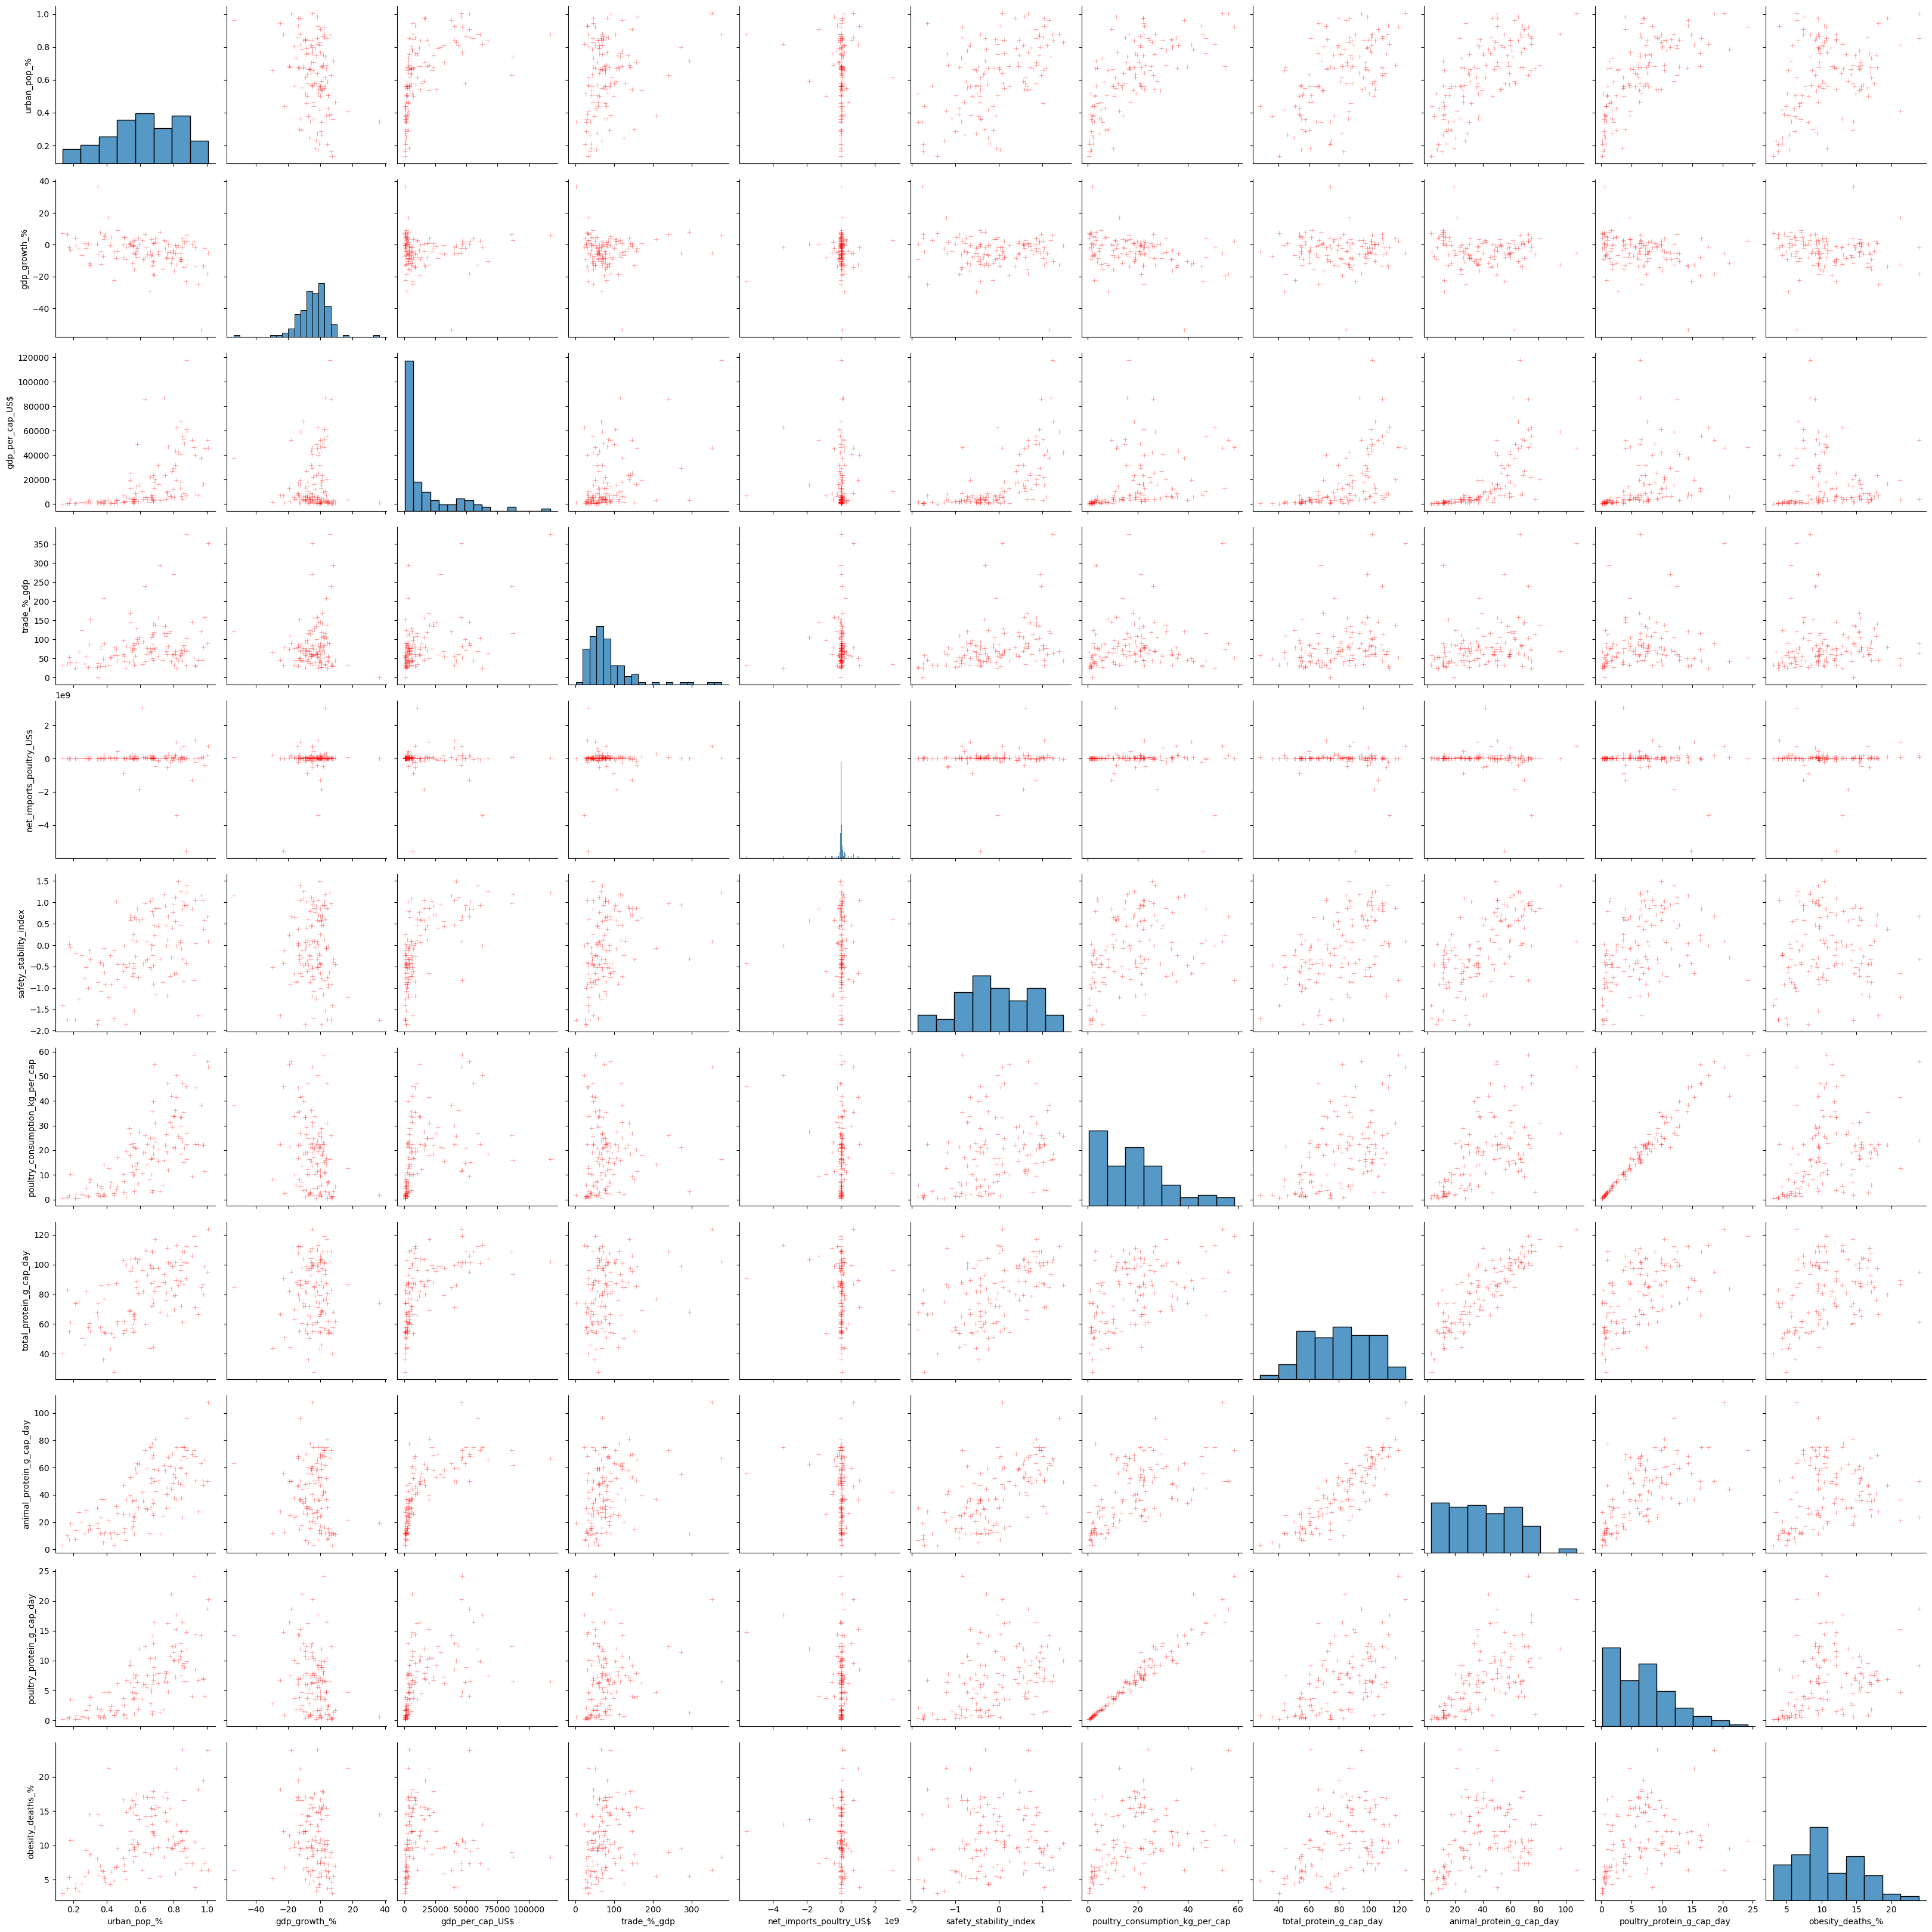

In [86]:
data_pairs = sns.pairplot(data_final, kind='scatter', height=3, diag_kind='auto',
                          markers="+", plot_kws= {'color': "Red",'alpha': 0.5})
plt.savefig("data_pairs.png")
plt.show()

### 6.2 - Heatmap des corrélations : <a class="anchor" id="chap6.2"></a>

In [87]:
data_final_corr = data[['urban_pop_%',
                   'gdp_growth_%', 'gdp_per_cap_US$','trade_%_gdp',
                   'net_imports_poultry_US$',
                   'safety_stability_index',
                   'poultry_consumption_kg_per_cap',
                   'total_protein_g_cap_day', 'animal_protein_g_cap_day',
                   'poultry_protein_g_cap_day',
                   'obesity_deaths_%', 
                   ]].copy()
data_final_corr.corr()

,urban_pop_%,gdp_growth_%,gdp_per_cap_US$,trade_%_gdp,net_imports_poultry_US$,safety_stability_index,poultry_consumption_kg_per_cap,total_protein_g_cap_day,animal_protein_g_cap_day,poultry_protein_g_cap_day,obesity_deaths_%
urban_pop_%,1.000000,-0.342333,0.559517,0.245359,-0.079690,0.512405,0.701470,0.569064,0.707117,0.699518,0.356950
gdp_growth_%,-0.342333,1.000000,0.048768,0.032356,0.100225,-0.136872,-0.328703,0.017713,-0.112890,-0.288844,-0.106148
gdp_per_cap_US$,0.559517,0.048768,1.000000,0.425236,-0.053374,0.635134,0.384463,0.577458,0.700447,0.457079,-0.034883
trade_%_gdp,0.245359,0.032356,0.425236,1.000000,0.057498,0.379411,0.120259,0.275458,0.371250,0.167892,0.012078
net_imports_poultry_US$,-0.079690,0.100225,-0.053374,0.057498,1.000000,0.046635,-0.172448,-0.102117,-0.116503,-0.154045,-0.065888
safety_stability_index,0.512405,-0.136872,0.635134,0.379411,0.046635,1.000000,0.315130,0.489855,0.657900,0.364607,0.059375
poultry_consumption_kg_per_cap,0.701470,-0.328703,0.384463,0.120259,-0.172448,0.315130,1.000000,0.505197,0.613993,0.973168,0.379415
total_protein_g_cap_day,0.569064,0.017713,0.577458,0.275458,-0.102117,0.489855,0.505197,1.000000,0.872698,0.548670,0.367432
animal_protein_g_cap_day,0.707117,-0.112890,0.700447,0.371250,-0.116503,0.657900,0.613993,0.872698,1.000000,0.658996,0.256573
poultry_protein_g_cap_day,0.699518,-0.288844,0.457079,0.167892,-0.154045,0.364607,0.973168,0.548670,0.658996,1.000000,0.328233


In [88]:
np.triu(np.ones_like(data_final_corr.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

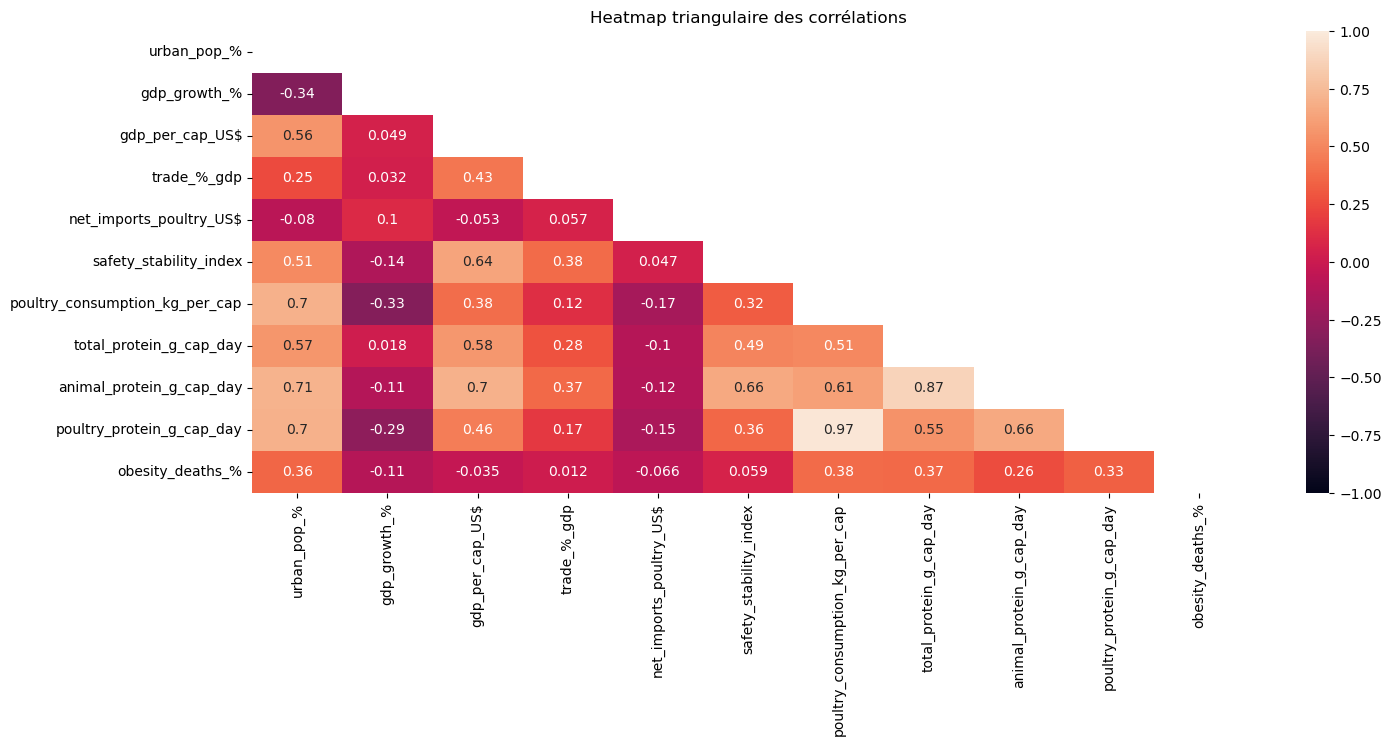

In [89]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_final_corr.corr(), dtype=bool))
heatmap = sns.heatmap(data_final_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap triangulaire des corrélations');